In [ ]:
'''
softmax(1단) vs Neural Net('여러 단'): 90%->94.5%
'Xavier' initialization: 97.8%
여기서 더 노드를 추가하면 오버피팅의 문제->dropout사용
Deep Neural Nets with 'Dropout': 98%'''

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost =  5.287762468
Epoch:  0002 cost =  1.604718128
Epoch:  0003 cost =  1.102973436
Epoch:  0004 cost =  0.898260206
Epoch:  0005 cost =  0.776920890
Epoch:  0006 cost =  0.695094529
Epoch:  0007 cost =  0.634155329
Epoch:  0008 cost =  0.587389937
Epoch:  0009 cost =  0.549488409
Epoch:  0010 cost =  0.519575230
Epoch:  0011 cost =  0.494719444
Epoch:  0012 cost =  0.473277276
Epoch:  0013 cost =  0.454528257
Epoch:  0014 cost =  0.438727241
Epoch:  0015 cost =  0.424769293
Epoch:  0016 cost =  0.412826915
Epoch:  0017 cost =  0.401962468
Epoch:  0018 cost =  0.391703650
Epoch:  0019 cost =  0.383217430
Epoch:  0020 cost =  0.375205271
Epoch:  0021 cost =  0.367515170
Epoch:  0022 cost =  0.361001784
Epoch:  0023 cost =  0.354154138
Epoch:  0024 cost =  0.348552979
Epoch:  0025 c

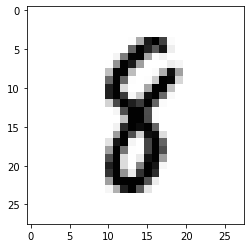

"\nsoftmax(1단) vs Neural Net('여러 단'): 90%->94.5%\n'Xavier' initialization: 97.8%\n여기서 더 노드를 추가하면 오버피팅의 문제->dropout사용\nDeep Neural Nets with 'Dropout': 98%"

In [11]:
#softmax classifier for MNIST
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784,10]))#784개의 벡터가 입력, out: 10(0-9까지)
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

learning_rate = 0.001
batch_size = 100
training_epoch = 50

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for iteration in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch: ', '%04d' %(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print('Learning Finished!')

    correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('prediction: ',
         sess.run(
         tf.argmax(hypothesis, axis = 1), feed_dict = {X: mnist.test.images[r: r+1]}),)
    
    plt.imshow(
        mnist.test.images[r: r+1].reshape(28,28),
        cmap = 'Greys',
        interpolation = 'nearest',
    )
    plt.show()

Epoch:  0001 cost =  157.576586422
Epoch:  0002 cost =  42.299128336
Epoch:  0003 cost =  26.620276166
Epoch:  0004 cost =  18.296517631
Epoch:  0005 cost =  13.531353110
Epoch:  0006 cost =  10.137256851
Epoch:  0007 cost =  7.368654977
Epoch:  0008 cost =  5.509895640
Epoch:  0009 cost =  4.094763815
Epoch:  0010 cost =  3.071100343
Epoch:  0011 cost =  2.281294159
Epoch:  0012 cost =  1.746653765
Epoch:  0013 cost =  1.315559733
Epoch:  0014 cost =  1.021366695
Epoch:  0015 cost =  0.818439385
Epoch:  0016 cost =  0.705058161
Epoch:  0017 cost =  0.620700402
Epoch:  0018 cost =  0.581238982
Epoch:  0019 cost =  0.487193047
Epoch:  0020 cost =  0.452537070
Epoch:  0021 cost =  0.383514902
Epoch:  0022 cost =  0.420286327
Epoch:  0023 cost =  0.386705441
Epoch:  0024 cost =  0.316619114
Epoch:  0025 cost =  0.292227929
Epoch:  0026 cost =  0.382204969
Epoch:  0027 cost =  0.285564513
Epoch:  0028 cost =  0.323911105
Epoch:  0029 cost =  0.238742795
Epoch:  0030 cost =  0.293635220
Epo

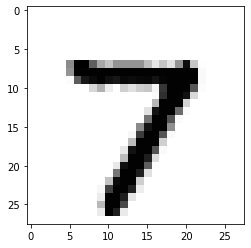

In [19]:
#NN for mnist
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for iteration in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d'%(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print('Learning Finished!')
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('Prediction: ',
         sess.run(tf.argmax(hypothesis, axis = 1), feed_dict=  {X: mnist.test.images[r:r+1]}),)
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap = 'Greys',
              interpolation = 'nearest',)
    plt.show()
#epoch, batch_size iteration 다 그대로 사용
#weight의 크기를 구하는게 중요, W1에서는 입력이 784, out은 256(그냥 정하면됨)
#맨 마지막은 10개로 확정
#overfitting->학습데이터를 너무 잘 기억해버리면 새로운 데이터가 들어왔을 때 추정을 못함.
#dropout: 네트워크가 오버피팅 되지 않도록 일부를 끊고 학습을 시킴
#텐서플로에서는 드롭아웃 레이어를 하나 더 넣어줌.
#dropout-> keep_prob(전체중 몇%의 네트웍을 keep해줄것인가): train할 때는 0.5~0.7(좀 쉬고 몇 %만 트레이닝 하자)
#실전에서는 '반드시' dropout을 1
#feed_dict에서 0.7만큼 드롭아웃
#optimizer-> 다양한 옵티마이저가 있음.
#AdamOptimizer-> 다른 형태의 옵티마이저
#batch normalization

Epoch: 0001 cost = 0.298920871
Epoch: 0002 cost = 0.107996223
Epoch: 0003 cost = 0.069463847
Epoch: 0004 cost = 0.050363309
Epoch: 0005 cost = 0.036342969
Epoch: 0006 cost = 0.029120363
Epoch: 0007 cost = 0.022991249
Epoch: 0008 cost = 0.016806440
Epoch: 0009 cost = 0.016912465
Epoch: 0010 cost = 0.012465208
Epoch: 0011 cost = 0.011911555
Epoch: 0012 cost = 0.012576086
Epoch: 0013 cost = 0.009762107
Epoch: 0014 cost = 0.011095417
Epoch: 0015 cost = 0.008301703
Epoch: 0016 cost = 0.009517114
Epoch: 0017 cost = 0.008371277
Epoch: 0018 cost = 0.004781670
Epoch: 0019 cost = 0.009468397
Epoch: 0020 cost = 0.009858462
Epoch: 0021 cost = 0.007321376
Epoch: 0022 cost = 0.005940149
Epoch: 0023 cost = 0.004470377
Epoch: 0024 cost = 0.004343228
Epoch: 0025 cost = 0.012208348
Epoch: 0026 cost = 0.004101054
Epoch: 0027 cost = 0.003117073
Epoch: 0028 cost = 0.003431736
Epoch: 0029 cost = 0.007674033
Epoch: 0030 cost = 0.005888326
Epoch: 0031 cost = 0.006139250
Epoch: 0032 cost = 0.004600020
Epoch: 0

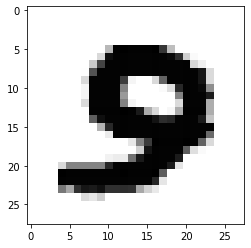

In [43]:
#Xavier for mnist
tf.reset_default_graph()#get_variable은 위의 걸 가져오는거라서 먼저 초기화시켜야함

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape = [784, 256], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable('W2', shape = [256, 256], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable('W3', shape = [256, 10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

learning_rate = 0.001
batch_size = 100
training_epoch = 50

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for iteration in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print('Learning Finished!')
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('Prediction: ', sess.run(tf.argmax(hypothesis, axis = 1), feed_dict= {X: mnist.test.images[r:r+1]}),)
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap = 'Greys',
              interpolation = 'nearest')
    plt.show()

Epoch:  0001 cost =  0.302214093
Epoch:  0002 cost =  0.104779627
Epoch:  0003 cost =  0.069754901
Epoch:  0004 cost =  0.054365800
Epoch:  0005 cost =  0.040154218
Epoch:  0006 cost =  0.032545072
Epoch:  0007 cost =  0.031277332
Epoch:  0008 cost =  0.021752477
Epoch:  0009 cost =  0.023494756
Epoch:  0010 cost =  0.020809496
Epoch:  0011 cost =  0.018997755
Epoch:  0012 cost =  0.017064759
Epoch:  0013 cost =  0.017000294
Epoch:  0014 cost =  0.013629394
Epoch:  0015 cost =  0.014335067
Epoch:  0016 cost =  0.012089055
Epoch:  0017 cost =  0.012387544
Epoch:  0018 cost =  0.012839215
Epoch:  0019 cost =  0.010582299
Epoch:  0020 cost =  0.014293560
Epoch:  0021 cost =  0.012029016
Epoch:  0022 cost =  0.007913630
Epoch:  0023 cost =  0.009635913
Epoch:  0024 cost =  0.012549133
Epoch:  0025 cost =  0.007447746
Epoch:  0026 cost =  0.010325008
Epoch:  0027 cost =  0.005317006
Epoch:  0028 cost =  0.010188674
Epoch:  0029 cost =  0.010685735
Epoch:  0030 cost =  0.007382327
Epoch:  00

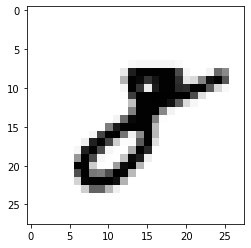

In [47]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable('W1', shape = [784, 512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable('W2', shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable('W3', shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable('W4', shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable('W5', shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for iteration in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d'%(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print('Learning Finished!')
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('Prediction: ', sess.run(tf.argmax(hypothesis, axis = 1), feed_dict = {X: mnist.test.images[r:r+1]}),)
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap = 'Greys',
              interpolation = 'nearest')
    plt.show()

Epoch: 0001 cost =  0.400901487
Epoch: 0002 cost =  0.160466005
Epoch: 0003 cost =  0.114320425
Epoch: 0004 cost =  0.099506435
Epoch: 0005 cost =  0.084935138
Epoch: 0006 cost =  0.077893027
Epoch: 0007 cost =  0.068013393
Epoch: 0008 cost =  0.064163955
Epoch: 0009 cost =  0.057832674
Epoch: 0010 cost =  0.053572740
Epoch: 0011 cost =  0.049927062
Epoch: 0012 cost =  0.050251175
Epoch: 0013 cost =  0.047954192
Epoch: 0014 cost =  0.043100720
Epoch: 0015 cost =  0.039803729
Epoch: 0016 cost =  0.038277272
Epoch: 0017 cost =  0.040676913
Epoch: 0018 cost =  0.040624977
Epoch: 0019 cost =  0.036287868
Epoch: 0020 cost =  0.035938086
Epoch: 0021 cost =  0.033548188
Epoch: 0022 cost =  0.033716273
Epoch: 0023 cost =  0.034114145
Epoch: 0024 cost =  0.033355159
Epoch: 0025 cost =  0.029929838
Epoch: 0026 cost =  0.027879659
Epoch: 0027 cost =  0.034645901
Epoch: 0028 cost =  0.031736999
Epoch: 0029 cost =  0.027553525
Epoch: 0030 cost =  0.030545123
Epoch: 0031 cost =  0.029513307
Epoch: 0

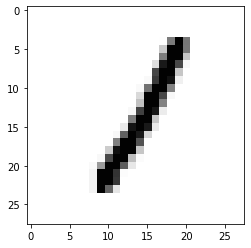

In [53]:
tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable('W1', shape = [784, 512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.get_variable('W2', shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

W3 = tf.get_variable('W3', shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

W4 = tf.get_variable('W4', shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

W5 = tf.get_variable('W5', shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epoch):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for iteration in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d'%(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print('Learning Finished!')
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('Prediction:', sess.run(tf.argmax(hypothesis, axis = 1), feed_dict = {X: mnist.test.images[r:r+1], keep_prob: 1}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap = 'Greys',
              interpolation = 'nearest')
    plt.show()

In [1]:
#MNIST and High-level TF API
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.01
training_epochs = 15
batch_size = 100
keep_prob = 0.7

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

hidden_output_size = 512
final_output_size = 10

xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

with arg_scope([fully_connected],
               activation_fn=tf.nn.relu,
               weights_initializer=xavier_init,
               biases_initializer=None,
               normalizer_fn=batch_norm,
               normalizer_params=bn_params
               ):
    hidden_layer1 = fully_connected(X, hidden_output_size, scope="h1")
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope="h2")
    h2_drop = dropout(hidden_layer2, keep_prob, is_training=train_mode)
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope="h3")
    h3_drop = dropout(hidden_layer3, keep_prob, is_training=train_mode)
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope="h4")
    h4_drop = dropout(hidden_layer4, keep_prob, is_training=train_mode)
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope="hypothesis")

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], train_mode: False}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

C:\Users\ehrme\AppData\Local\Continuum\anaconda3\envs\sugyeong_2019\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ehrme\AppData\Local\Continuum\anaconda3\envs\sugyeong_2019\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\ehrme\AppData\Local\Continuum\anaconda3\envs\sugyeong_2019\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\ehrme\AppData\Local\Continuum\anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ehrme\AppData\Local\Continuum\anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Pass

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[Epoch:    1] cost = 0.385021312
[Epoch:    2] cost = 0.330945265
[Epoch:    3] cost = 0.32151347
[Epoch:    4] cost = 0.314746348
[Epoch:    5] cost = 0.311675545
[Epoch:    6] cost = 0.311172576
[Epoch:    7] cost = 0.307103227
[Epoch:    8] cost = 0.305624824
[Epoch:    9] cost = 0.305231285
[Epoch:   10] cost = 0.30407103
[Epoch:   11] cost = 0.304704691
[Epoch:   12] cost = 0.302756819
[Epoch:   13] cost = 0.302836068
[Epoch:   14] cost = 0.302418209
[Epoch:   15] cost = 0.302424194
Learning Finished!
Accuracy: 0.9832
Label:  [2]
Prediction:  [2]


<Figure size 640x480 with 1 Axes>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 cost = 0.488546528
Epoch: 0002 cost = 0.159637394
Epoch: 0003 cost = 0.126090051
Epoch: 0004 cost = 0.107046438
Epoch: 0005 cost = 0.093400184
Epoch: 0006 cost = 0.091438809
Epoch: 0007 cost = 0.091849969
Epoch: 0008 cost = 0.070853417
Epoch: 0009 cost = 0.083745525
Epoch: 0010 cost = 0.069688527
Epoch: 0011 cost = 0.062600825
Epoch: 0012 cost = 0.058266515
Epoch: 0013 cost = 0.058314489
Epoch: 0014 cost = 0.052436945
Epoch: 0015 cost = 0.052838520
Epoch: 0016 cost = 0.051160841
Epoch: 0017 cost = 0.052705045
Epoch: 0018 cost = 0.051496073
Epoch: 0019 cost = 0.043858985
Epoch: 0020 cost = 0.044197814
Epoch: 0021 cost = 0.045294741
Epoch: 0022 cost = 0.041473348
Epoch: 0023 cost = 0.037360876

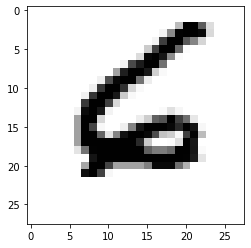

In [2]:
# MNIST and Dropout
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numbers
from tensorflow.contrib import layers
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
from tensorflow.python.framework import tensor_util
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import random_ops
from tensorflow.python.ops import array_ops
from tensorflow.python.layers import utils

from tensorflow.examples.tutorials.mnist import input_data

def selu(x):
    with ops.name_scope('elu') as scope:
        alpha = 1.6732632423543772848170429916717
        scale = 1.0507009873554804934193349852946
        return scale*tf.where(x>=0.0, x, alpha*tf.nn.elu(x))


def dropout_selu(x, keep_prob, alpha= -1.7580993408473766, fixedPointMean=0.0, fixedPointVar=1.0,
                 noise_shape=None, seed=None, name=None, training=False):

    def dropout_selu_impl(x, rate, alpha, noise_shape, seed, name):
        keep_prob = 1.0 - rate
        x = ops.convert_to_tensor(x, name="x")
        if isinstance(keep_prob, numbers.Real) and not 0 < keep_prob <= 1:
            raise ValueError("keep_prob must be a scalar tensor or a float in the "
                                             "range (0, 1], got %g" % keep_prob)
        keep_prob = ops.convert_to_tensor(keep_prob, dtype=x.dtype, name="keep_prob")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        alpha = ops.convert_to_tensor(alpha, dtype=x.dtype, name="alpha")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        if tensor_util.constant_value(keep_prob) == 1:
            return x

        noise_shape = noise_shape if noise_shape is not None else array_ops.shape(x)
        random_tensor = keep_prob
        random_tensor += random_ops.random_uniform(noise_shape, seed=seed, dtype=x.dtype)
        binary_tensor = math_ops.floor(random_tensor)
        ret = x * binary_tensor + alpha * (1-binary_tensor)

        a = tf.sqrt(fixedPointVar / (keep_prob *((1-keep_prob) * tf.pow(alpha-fixedPointMean,2) + fixedPointVar)))

        b = fixedPointMean - a * (keep_prob * fixedPointMean + (1 - keep_prob) * alpha)
        ret = a * ret + b
        ret.set_shape(x.get_shape())
        return ret

    with ops.name_scope(name, "dropout", [x]) as name:
        return utils.smart_cond(training,
                                lambda: dropout_selu_impl(x, keep_prob, alpha, noise_shape, seed, name),
                                lambda: array_ops.identity(x))

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 50
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = selu(tf.matmul(X, W1) + b1)
L1 = dropout_selu(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = selu(tf.matmul(L1, W2) + b2)
L2 = dropout_selu(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = selu(tf.matmul(L2, W3) + b3)
L3 = dropout_selu(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = selu(tf.matmul(L3, W4) + b4)
L4 = dropout_selu(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.truncated_normal([784, 30]))
b1 = tf.Variable(tf.truncated_normal([1, 30]))
w2 = tf.Variable(tf.truncated_normal([30, 10]))
b2 = tf.Variable(tf.truncated_normal([1, 10]))


def sigma(x):
    return tf.div(tf.constant(1.0),
                  tf.add(tf.constant(1.0), tf.exp(-x)))


def sigma_prime(x):
    return sigma(x) * (1 - sigma(x))

l1 = tf.add(tf.matmul(X, w1), b1)
a1 = sigma(l1)
l2 = tf.add(tf.matmul(a1, w2), b2)
y_pred = sigma(l2)

assert y_pred.shape.as_list() == Y.shape.as_list()
diff = (y_pred - Y)

d_l2 = diff * sigma_prime(l2)
d_b2 = d_l2
d_w2 = tf.matmul(tf.transpose(a1), d_l2)

d_a1 = tf.matmul(d_l2, tf.transpose(w2))
d_l1 = d_a1 * sigma_prime(l1)
d_b1 = d_l1
d_w1 = tf.matmul(tf.transpose(X), d_l1)

learning_rate = 0.5
step = [
    tf.assign(w1, w1 - learning_rate * d_w1),
    tf.assign(b1, b1 - learning_rate *
              tf.reduce_mean(d_b1, reduction_indices=[0])),
    tf.assign(w2, w2 - learning_rate * d_w2),
    tf.assign(b2, b2 - learning_rate *
              tf.reduce_mean(d_b2, reduction_indices=[0]))
]

acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(10)
    sess.run(step, feed_dict={X: batch_xs,
                              Y: batch_ys})
    if i % 1000 == 0:
        res = sess.run(acct_res, feed_dict={X: mnist.test.images[:1000],
                                            Y: mnist.test.labels[:1000]})
        print(res)

cost = diff * diff
step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
88.0
817.0
881.0
892.0
910.0
890.0
914.0
904.0
928.0
919.0
